In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df=pd.read_csv('FakeNews.csv')

In [3]:
df.head()

,title,news_url,source_domain,tweet_num,label
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [4]:
df.label.value_counts()

label
1    17441
0     5755
Name: count, dtype: int64

In [5]:
df.isna().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
label              0
dtype: int64

In [6]:
x=df['title']
y=df['label']

In [7]:
y.value_counts()

label
1    17441
0     5755
Name: count, dtype: int64

<Axes: ylabel='count'>

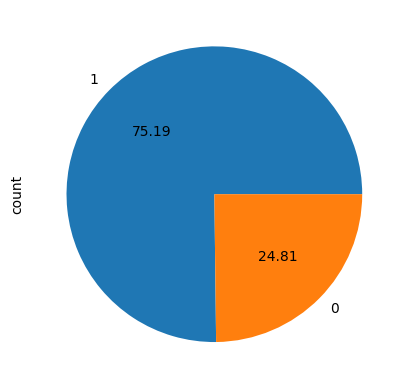

In [8]:
#class distribution plot
y.value_counts().plot.pie(autopct="%.2f")

In [9]:
# Random Undersampling
rus=RandomUnderSampler(sampling_strategy=1)  # sampling strategy ranges from 0 to 1
x_res,y_res=rus.fit_resample(x.values.reshape(-1,1),y)


In [10]:
y_res.value_counts()

label
0    5755
1    5755
Name: count, dtype: int64

In [11]:
# Preparing data for modeling 
X=x_res
y=y_res

In [12]:
X.shape,y.shape

((11510, 1), (11510,))

In [13]:
# Data splitting for training and testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
len(X_train),len(X_test)

(9208, 2302)

In [15]:
# Converting text data to lowercase
X_train = [str(text).lower() for text in X_train]
X_test = [str(text).lower() for text in X_test]

In [16]:
# Initializing TF-IDF Vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english')

In [17]:
# Fitting and transforming the training data 
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)

In [18]:
# Transforming the test data 
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [19]:
X_test_tfidf.shape,X_train_tfidf.shape

((2302, 11105), (9208, 11105))

In [20]:
# Random Forest Classifier
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42,oob_score=True)

In [21]:
# Trainig the classifier
rf_classifier.fit(X_train_tfidf,y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [22]:
# OOB Score 
rf_classifier.oob_score_

0.7668331885317116

In [23]:
# Predicting on test data
y_pred = rf_classifier.predict(X_test_tfidf)

In [24]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [25]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[903 271]
 [241 887]]


In [26]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1174
           1       0.77      0.79      0.78      1128

    accuracy                           0.78      2302
   macro avg       0.78      0.78      0.78      2302
weighted avg       0.78      0.78      0.78      2302



In [27]:
def plot_confusion_matrix(y_true, y_pred, filename=None):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Real', 'Fake']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    if filename:
        plt.savefig(filename)  
    plt.show()

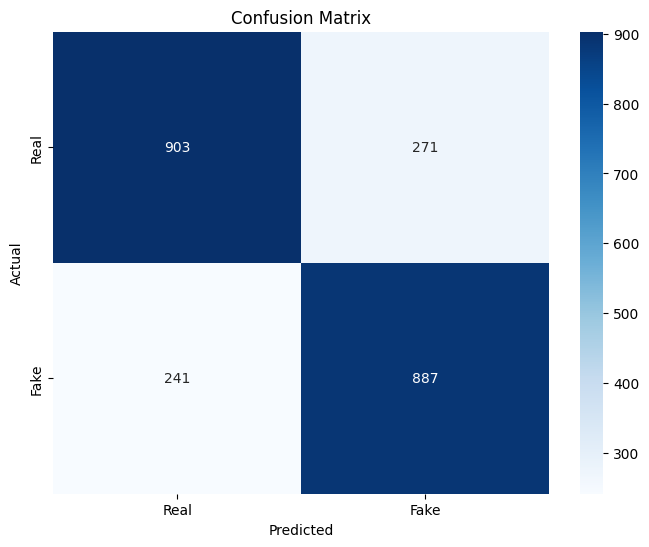

In [28]:
plot_confusion_matrix(y_test, y_pred,filename='confusion_matrix.png')